# Анализ гипотиз и А/В тест для интернет-магазина

Аналитик крупного интернет-магазина вместе с отделом маркетинга подготовил список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

Описание исходных данных:

**Часть 1. Приоритизация гипотез.**
В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

**Часть 2. Анализ A/B-теста**

Результаты А/В-теста описаны в файлах orders.csv и visitors.csv.
**Задача**
Проанализировать A/B-тест:
- Построить график кумулятивной выручки по группам. 
- Построить график кумулятивного среднего чека по группам. 
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. 
- Построить график кумулятивного среднего количества заказов на посетителя по группам.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
- Построить точечный график количества заказов по пользователям. 
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. 
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
- Посчитатьстатистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
- Принять решение по результатам теста:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.


## Приоритизация гипотез

### Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta as dt
from matplotlib import pyplot as plt
from scipy import stats as st
import math as mth

In [2]:
hypothesis=pd.read_csv('datasets/hypothesis.csv')

In [3]:
pd.set_option('display.max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В датафрейме hypothesis не много данных, весь датафрейм можно проверить визуальною Всего в датафрейме 9 гипотез и их оценки по параметрам.

### Приоритезация гипотез

Проверю гипотезы способом ICE

In [5]:
hypothesis['ICE']=hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Проверю гипотезы способом RICE

In [6]:
hypothesis['RICE']=hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Результаты применения методики ICE и RICE отличаются и не смотря на то, что гипотезы из нижний половины так и остались внизу ранжирование сильно отличается. На это повлиял дополнительный параметр Reach (скольких пользователей затронет изменение, которое вы хотите внести) являющийся множителем в методике RICE. В гипотезе 8, которая возглавила рейтинг ICE этот параметр равен 1, а в гипотезе 7 возглавляющей рейтинг RICE, параметр Reach равен 10, то есть изменение затронет всех пользователей.

## Анализ A/B-теста

### Подготовка данных

In [7]:
visitors, orders = ( 
    pd.read_csv('datasets/visitors.csv'),  # журнал посещений
    pd.read_csv('datasets/orders.csv'),  # покупки
)

In [8]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
visitors.duplicated().sum() # ищем явные дубликаты

0

In [13]:
orders.duplicated().sum() # ищем явные дубликаты

0

Пропуски в столбцах отсутствуют, явных дубликатов тоже нет

In [14]:
visitors['date'] = pd.to_datetime(visitors['date']) # изменю формат на дату

In [15]:
orders['date'] =  pd.to_datetime(orders['date']) # изменю формат на дату

Проверю корректность разбиения пользователей на группы, возможно есть пользователи, попавшие в обе группы

In [16]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

Нашлось 58 таких пользователей, это менее 10% выборки, удалю данные этих пользователей из таблицы, после анализа будет ясно хватило ли данных

In [17]:
double_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId'].unique()

In [18]:
orders = orders.query('visitorId not in @double_users')

### Строю график кумулятивной выручки по группам

In [19]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах и о посетителях интернет-магазина

In [20]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [21]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


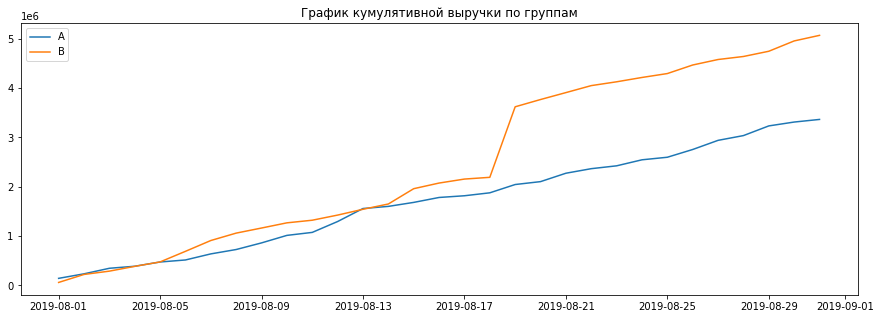

In [23]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]
plt.figure(figsize=(15,5))
plt.title('График кумулятивной выручки по группам')
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A');

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');

plt.legend(); 

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак. 13 августа выручка по группам равна.
Однако график выручки группы В имеет резкий скачек роста 19 августа. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Строю  график кумулятивного среднего чека по группам

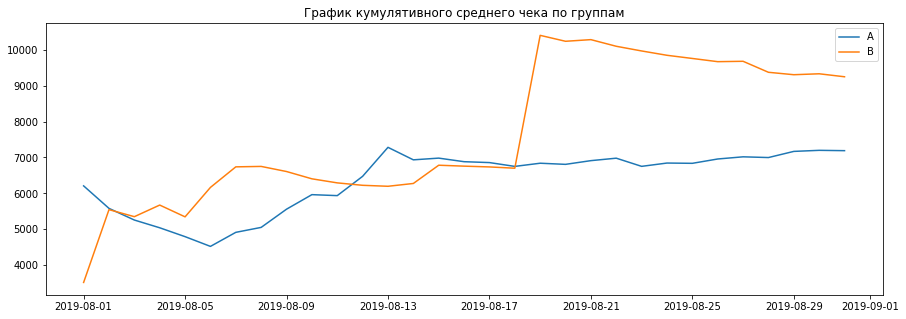

In [24]:
plt.figure(figsize=(15,5))
plt.title('График кумулятивного среднего чека по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend(); # Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

Средний чек постепенно растет для обеих групп, на этом графике, как и на предыдущем виден скачек у группы В в августе. Значит на графике выручки скачек произошел из-за увеличения среднего чека, а не роста количества заказов. Есть всплески для группы А, в конце средние чеки начали сближаться, чек группы В падает, чек группы А растет.

### Строю  график относительного изменения кумулятивного среднего чека группы B к группе A

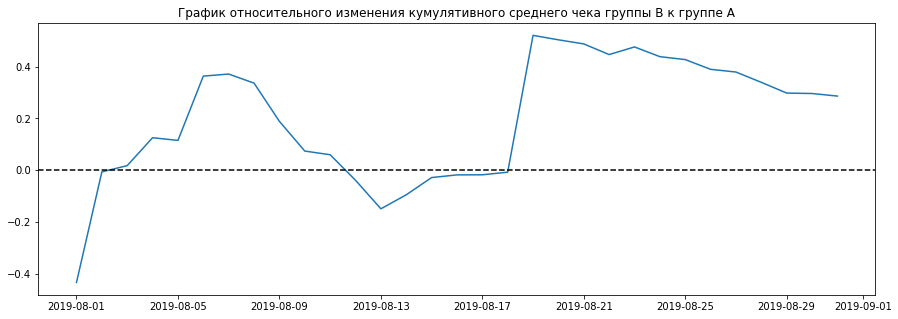

In [25]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--'); 

Средний чек "B" рос с 1 августа, 2 августа уже превысил "A" и рос до 7 августа. 7-8 пошло обратное движение до 13 августа, причем 3 дня 12-14 акгуста средний чек "A" был больше "B". Но не надолго, с 13 чек "B" опять начал расти и уже 15 августа наступил переломный момент и на следующий день чек "B" оказался больше и находился больше "A" до конца месяца. Опять же здесь хорошо видно, что 19 августа был сильный всплеск (рост) за счет заказа с аномально большим объемом, а в последующие дни средний чек "B" также постепенно снижался.

### Строю график кумулятивного среднего количества заказов на посетителя по группам

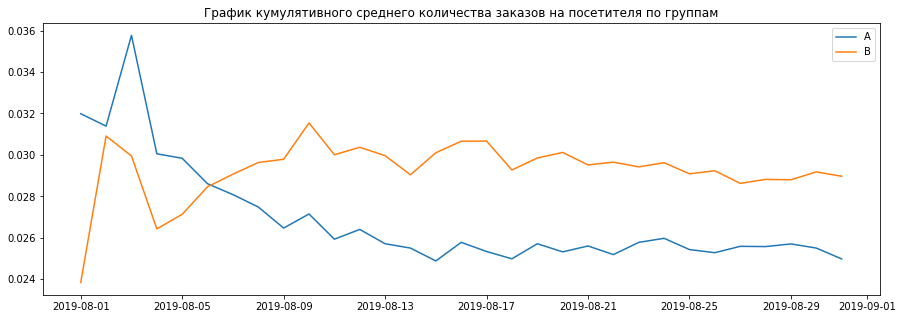

In [26]:
plt.figure(figsize=(15,5))
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A');

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B');

plt.legend();

видно что в начале наблюдений были резкие скачки в количестве заказов в обеих группах, но после 6 августа группа Б уверенно лидирует, после 20 августа ситуация стабилизировалась и каких-то скачков в количестве заказов не наблюдалось. Этот график еще раз подтверждает что резкий пик выручки 19 августа обусловлен суммой заказа, а не количеством 

### Строю график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

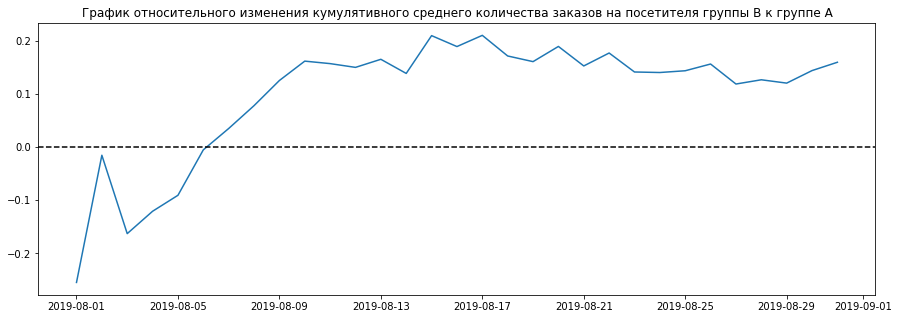

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--'); 

Из графика видно, что после колебаний в период с 1 по 5 августа, с 6 августа начался относительный рост среднего количества заказов в группе, но с 17 августа рост прекратился и началось плавное снижение, тем не менее на 1 сентября, среднее количество заказов в группе В все еще больше чем в группе А

### Строю точечный график количества заказов по пользователям

In [28]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


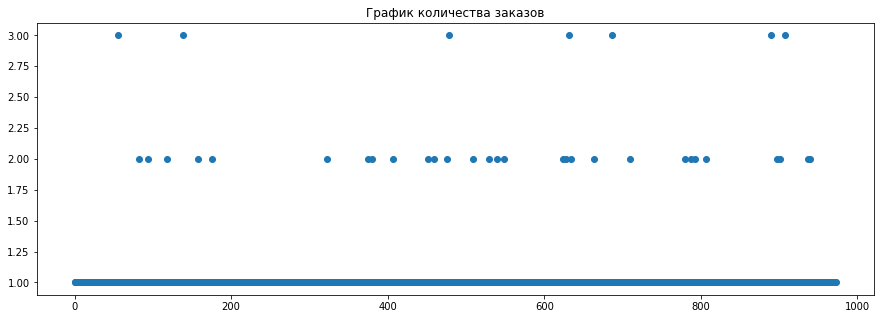

In [29]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.title('График количества заказов')
plt.scatter(x_values, ordersByUsers['orders']);

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2 заказами тоже значительна. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

### Посчитаю 95-й и 99-й перцентили количества заказов на пользователя. Выберу границу для определения аномальных пользователей

In [30]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 1% пользователей оформляли более 2 заказов. Разумно выбрать 1 заказ на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Строю точечный график стоимостей заказов

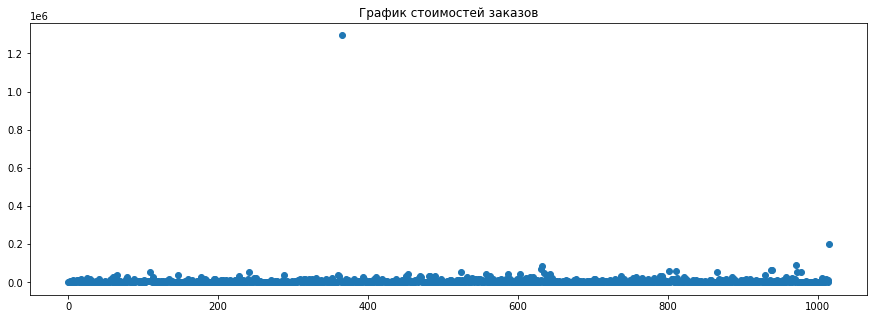

In [31]:
plt.figure(figsize=(15,5))
plt.title('График стоимостей заказов')
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

Из-за одного аномального заказа более чем на 1,2млн масштаб графика получился не удобным, уберу заказы до 200 тысяч и построю график еще раз, что бы детальнее посмотреть на другие заказы

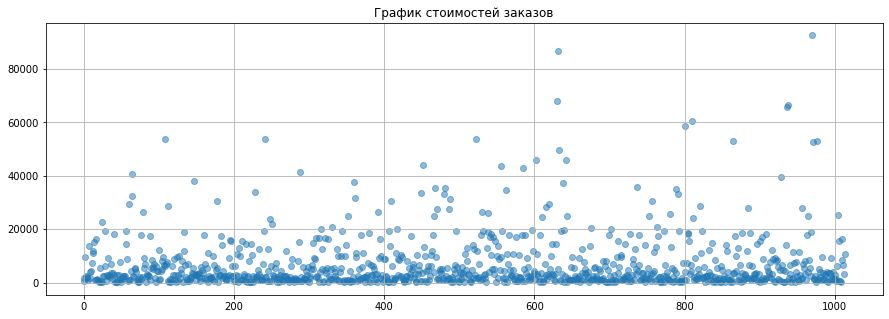

In [32]:
norm_orders = orders[orders['revenue']<=195000]['revenue']
xn_values = pd.Series(range(0,len(norm_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(xn_values, norm_orders, alpha=0.5);

Видно что все заказы не считая двух лежат ниже 100 тысяч, для того что бы определить выбросы, посчитаю процентили

### Считаю 95-й и 99-й перцентили стоимости заказов. Выбераю границу для определения аномальных заказов

In [33]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов больше 27 тысяч и только 1% превышает 53 тысячи, выберу для определения границы  аномальных заказов 30000 чуть выше 95 процентиля

### Посчитаю статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулирую гипотезы. 

Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [34]:
# подготовка данных
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [35]:
# ordersPerDateA — количество заказов в выбранную дату в группе A;
# revenuePerDateA — суммарная выручка в выбранную дату в группе A;
# ordersPerDateB — количество заказов в выбранную дату в группе B;
# revenuePerDateB — суммарная выручка в выбранную дату в группе B;
# ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
# revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
# ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
# revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
# visitorsPerDateA — количество пользователей в выбранную дату в группе A;
# visitorsPerDateB — количество пользователей в выбранную дату в группе B;
# visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
# visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B

In [36]:
# Считаю статистическую значимость различия в среднем количестве заказов между группами.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

# переменным sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов


sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:'"{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)


p-value:0.011


'0.160'

Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Второе число 0,160 - группа В выигрывает перед группой А на 16%. Вывод: По «сырым» данным есть различия в среднем числе заказов групп A и B 

### Посчитаю статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [37]:
# передаю критерию mannwhitneyu() данные о выручке с заказов и нахожу относительные различия в среднем чеке между группами
print('p-value:''{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value:0.829
0.287


P-value=0,829 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Наблюдаемое различие 28,7% среднего чека группы B относительно среднего чека группы A не является статистически значимым.

### Посчитаю статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [38]:
# Узнаю, сколько всего аномальных пользователей атрибутом shape
revenue_lim = 30000
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Аномальных пользователей:', abnormalUsers.shape[0]) 

1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
Name: visitorId, dtype: int64
Аномальных пользователей: 77


<div class="alert alert-warning">
    
      
  ⚠️ Тут можно или непосредственно вычисления по 95 / 99 перцентилю, например:
```python 
revenue_lim = np.percentile(orders['revenue'], 95)`
```
или задавать в качестве отдельной переменой:

```python 
revenue_lim = 100000
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']`
```

</div>

In [39]:
# готовлю выборки количества заказов по пользователям по группам теста

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [40]:
# применяю статистический критерий Манна-Уитни к полученным выборкам:
print('p-value:''{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value:0.013
0.180


Результаты  по среднему количеству заказов практически не изменились относительно исследования по сырым данным. По очищенным данным нулевую гипотезу так же отвергаем, различия в среднем количестве заказов есть и они статистически значимы.

### Посчитаю статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [41]:
print(
    'p-value:''{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value:0.829
-0.011


P-value увеличился, по очищенным данным получаем такой же статистический результат, различий в среднем чеке между группами нет. Разница между сегментами -1% не является статистически значимой

### Решение по результатам теста

Выводы по результатам тестирования:
    
- Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;    
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A стабильно более 80% времени тестирования, тенденции к ухудшению результатов не наблюдается;
- График различия среднего чека говорит о том, что результаты группы B улучшались за счет аномальных крупных покупок, после таких покупок постепенно данные сближались.

**Исходя из обнаруженных фактов, тест следует остановить и признать его успешным в части увеличения среднего количества заказов в группе В, по среднему чеку группы примерно равны.**